<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Capstone-Project---Cricket-Dashboard" data-toc-modified-id="Capstone-Project---Cricket-Dashboard-0">Capstone Project - Cricket Dashboard</a></span></li></ul></div>

### Capstone Project - Cricket Dashboard

- __Student name: Vidya Menon__  
- __Student pace: Full time__    
- __Scheduled project review date: July 27, 2020__   
- __Instructor name: Amber Yandow__

In [83]:
# Importing Libraries
import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns

import dash
from dash.dependencies import Input, Output
import dash_core_components as dcc
import dash_html_components as html

import warnings
warnings.filterwarnings('ignore')

import dbm
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.express as px

In [84]:
# Set up the app
app = dash.Dash(__name__)
app.config.suppress_callback_exceptions = True
server = app.server

In [85]:
# Defining the style of our Tabs

tabs_styles = {
    'height': '44px','width':'532px'
}
tab_style = {
    'borderBottom': '1px solid #d6d6d6',
    'padding': '6px',
    'fontWeight': 'bold'
}

tab_selected_style = {
    'borderTop': '1px solid #d6d6d6',
    'borderBottom': '1px solid #d6d6d6',
    'backgroundColor': '#119DFF',
    'color': 'white',
    'padding': '6px'
}

In [86]:
# Creating dataframe for our Batsmen

global odi_bat
odi_bat = pd.read_csv('data/odiBatting_dataframe.csv')

In [87]:
odi_bat

,Player_Name,Country,Runs,Mins,BF,4s,6s,SR,Inns,Oppn,Ground,Date
0,JD Ryder,NZ,32,59,43,1,3,74.41,1,v West Indies,Christchurch,3-Jan-09
1,BB McCullum,NZ,1,10,2,0,0,50,1,v West Indies,Christchurch,3-Jan-09
2,JM How,NZ,27,60,36,2,0,75,1,v West Indies,Christchurch,3-Jan-09
3,LRPL Taylor,NZ,13,32,20,0,0,65,1,v West Indies,Christchurch,3-Jan-09
4,DR Flynn,NZ,4,6,5,0,0,80,1,v West Indies,Christchurch,3-Jan-09
...,...,...,...,...,...,...,...,...,...,...,...,...
32313,C de Grandhomme,NZ,25,-,26,3,0,96.15,2,v Australia,Sydney,13-Mar-20
32314,MJ Santner,NZ,14,-,16,1,0,87.5,2,v Australia,Sydney,13-Mar-20
32315,IS Sodhi,NZ,14*,-,16,1,0,87.5,2,v Australia,Sydney,13-Mar-20
32316,LH Ferguson,NZ,1,-,7,0,0,14.28,2,v Australia,Sydney,13-Mar-20


In [88]:
odi_bat['Date'] = pd.to_datetime(odi_bat['Date'].astype(str))

In [89]:
odi_bat['Player_Name'] = odi_bat['Player_Name'].str.strip()

In [90]:
odi_bat

,Player_Name,Country,Runs,Mins,BF,4s,6s,SR,Inns,Oppn,Ground,Date
0,JD Ryder,NZ,32,59,43,1,3,74.41,1,v West Indies,Christchurch,2009-01-03
1,BB McCullum,NZ,1,10,2,0,0,50,1,v West Indies,Christchurch,2009-01-03
2,JM How,NZ,27,60,36,2,0,75,1,v West Indies,Christchurch,2009-01-03
3,LRPL Taylor,NZ,13,32,20,0,0,65,1,v West Indies,Christchurch,2009-01-03
4,DR Flynn,NZ,4,6,5,0,0,80,1,v West Indies,Christchurch,2009-01-03
...,...,...,...,...,...,...,...,...,...,...,...,...
32313,C de Grandhomme,NZ,25,-,26,3,0,96.15,2,v Australia,Sydney,2020-03-13
32314,MJ Santner,NZ,14,-,16,1,0,87.5,2,v Australia,Sydney,2020-03-13
32315,IS Sodhi,NZ,14*,-,16,1,0,87.5,2,v Australia,Sydney,2020-03-13
32316,LH Ferguson,NZ,1,-,7,0,0,14.28,2,v Australia,Sydney,2020-03-13


In [91]:
odi_bat.loc[odi_bat['Player_Name']=='TA Boult', ['Player_Name', 'Date']]

,Player_Name,Date
11032,TA Boult,2012-07-11
11065,TA Boult,2012-07-14
11087,TA Boult,2012-07-16
11403,TA Boult,2012-11-04
11427,TA Boult,2012-11-06
...,...,...
30623,TA Boult,2019-06-29
30733,TA Boult,2019-07-03
30875,TA Boult,2019-07-09
30919,TA Boult,2019-07-14


In [92]:
odi_bat = odi_bat.drop(odi_bat[odi_bat['Runs'] == 'DNB'].index) 
odi_bat = odi_bat.drop(odi_bat[odi_bat['Runs'] == 'absent'].index)
odi_bat = odi_bat.drop(odi_bat[odi_bat['Runs'] == 'TDNB'].index)

In [93]:
odi_bat

,Player_Name,Country,Runs,Mins,BF,4s,6s,SR,Inns,Oppn,Ground,Date
0,JD Ryder,NZ,32,59,43,1,3,74.41,1,v West Indies,Christchurch,2009-01-03
1,BB McCullum,NZ,1,10,2,0,0,50,1,v West Indies,Christchurch,2009-01-03
2,JM How,NZ,27,60,36,2,0,75,1,v West Indies,Christchurch,2009-01-03
3,LRPL Taylor,NZ,13,32,20,0,0,65,1,v West Indies,Christchurch,2009-01-03
4,DR Flynn,NZ,4,6,5,0,0,80,1,v West Indies,Christchurch,2009-01-03
...,...,...,...,...,...,...,...,...,...,...,...,...
32313,C de Grandhomme,NZ,25,-,26,3,0,96.15,2,v Australia,Sydney,2020-03-13
32314,MJ Santner,NZ,14,-,16,1,0,87.5,2,v Australia,Sydney,2020-03-13
32315,IS Sodhi,NZ,14*,-,16,1,0,87.5,2,v Australia,Sydney,2020-03-13
32316,LH Ferguson,NZ,1,-,7,0,0,14.28,2,v Australia,Sydney,2020-03-13


In [94]:
odi_bat['Runs_only'] = odi_bat['Runs']
odi_bat

,Player_Name,Country,Runs,Mins,BF,4s,6s,SR,Inns,Oppn,Ground,Date,Runs_only
0,JD Ryder,NZ,32,59,43,1,3,74.41,1,v West Indies,Christchurch,2009-01-03,32
1,BB McCullum,NZ,1,10,2,0,0,50,1,v West Indies,Christchurch,2009-01-03,1
2,JM How,NZ,27,60,36,2,0,75,1,v West Indies,Christchurch,2009-01-03,27
3,LRPL Taylor,NZ,13,32,20,0,0,65,1,v West Indies,Christchurch,2009-01-03,13
4,DR Flynn,NZ,4,6,5,0,0,80,1,v West Indies,Christchurch,2009-01-03,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32313,C de Grandhomme,NZ,25,-,26,3,0,96.15,2,v Australia,Sydney,2020-03-13,25
32314,MJ Santner,NZ,14,-,16,1,0,87.5,2,v Australia,Sydney,2020-03-13,14
32315,IS Sodhi,NZ,14*,-,16,1,0,87.5,2,v Australia,Sydney,2020-03-13,14*
32316,LH Ferguson,NZ,1,-,7,0,0,14.28,2,v Australia,Sydney,2020-03-13,1


In [95]:
odi_bat['Not_Outs'] = 0
odi_bat

,Player_Name,Country,Runs,Mins,BF,4s,6s,SR,Inns,Oppn,Ground,Date,Runs_only,Not_Outs
0,JD Ryder,NZ,32,59,43,1,3,74.41,1,v West Indies,Christchurch,2009-01-03,32,0
1,BB McCullum,NZ,1,10,2,0,0,50,1,v West Indies,Christchurch,2009-01-03,1,0
2,JM How,NZ,27,60,36,2,0,75,1,v West Indies,Christchurch,2009-01-03,27,0
3,LRPL Taylor,NZ,13,32,20,0,0,65,1,v West Indies,Christchurch,2009-01-03,13,0
4,DR Flynn,NZ,4,6,5,0,0,80,1,v West Indies,Christchurch,2009-01-03,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32313,C de Grandhomme,NZ,25,-,26,3,0,96.15,2,v Australia,Sydney,2020-03-13,25,0
32314,MJ Santner,NZ,14,-,16,1,0,87.5,2,v Australia,Sydney,2020-03-13,14,0
32315,IS Sodhi,NZ,14*,-,16,1,0,87.5,2,v Australia,Sydney,2020-03-13,14*,0
32316,LH Ferguson,NZ,1,-,7,0,0,14.28,2,v Australia,Sydney,2020-03-13,1,0


In [96]:
odi_bat.dtypes

Player_Name            object
Country                object
Runs                   object
Mins                   object
BF                     object
4s                     object
6s                     object
SR                     object
Inns                   object
Oppn                   object
Ground                 object
Date           datetime64[ns]
Runs_only              object
Not_Outs                int64
dtype: object

In [97]:
#for player in odi_bat['Player_Name']:
odi_bat['Not_Outs'] = odi_bat['Runs_only'].str.endswith('*').astype(int)

odi_bat

,Player_Name,Country,Runs,Mins,BF,4s,6s,SR,Inns,Oppn,Ground,Date,Runs_only,Not_Outs
0,JD Ryder,NZ,32,59,43,1,3,74.41,1,v West Indies,Christchurch,2009-01-03,32,0
1,BB McCullum,NZ,1,10,2,0,0,50,1,v West Indies,Christchurch,2009-01-03,1,0
2,JM How,NZ,27,60,36,2,0,75,1,v West Indies,Christchurch,2009-01-03,27,0
3,LRPL Taylor,NZ,13,32,20,0,0,65,1,v West Indies,Christchurch,2009-01-03,13,0
4,DR Flynn,NZ,4,6,5,0,0,80,1,v West Indies,Christchurch,2009-01-03,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32313,C de Grandhomme,NZ,25,-,26,3,0,96.15,2,v Australia,Sydney,2020-03-13,25,0
32314,MJ Santner,NZ,14,-,16,1,0,87.5,2,v Australia,Sydney,2020-03-13,14,0
32315,IS Sodhi,NZ,14*,-,16,1,0,87.5,2,v Australia,Sydney,2020-03-13,14*,1
32316,LH Ferguson,NZ,1,-,7,0,0,14.28,2,v Australia,Sydney,2020-03-13,1,0


In [98]:
odi_bat.to_csv('bat.csv')

In [99]:
odi_bat['Inns'].unique

<bound method Series.unique of 0        1
1        1
2        1
3        1
4        1
        ..
32313    2
32314    2
32315    2
32316    2
32317    2
Name: Inns, Length: 25862, dtype: object>

In [100]:
odi_bat['Runs_only'] = odi_bat['Runs_only'].str.strip('*')
odi_bat['Runs'] = odi_bat['Runs'].str.strip('*')

In [101]:
odi_bat['Not_Outs'].unique()

array([0, 1])

In [102]:
odi_bat['Runs_only'].unique()

array(['32', '1', '27', '13', '4', '25', '30', '0', '6', '36', '67', '2',
       '15', '3', '28', '18', '5', '45', '8', '14', '51', '23', '26',
       '122', '75', '24', '46', '17', '16', '39', '10', '64', '9', '52',
       '21', '22', '43', '31', '7', '135', '94', '19', '41', '48', '54',
       '92', '12', '59', '38', '33', '79', '71', '63', '40', '78', '72',
       '44', '35', '37', '11', '42', '49', '83', '100', '20', '76', '62',
       '34', '69', '29', '60', '137', '50', '80', '82', '77', '74', '107',
       '61', '90', '68', '56', '97', '55', '66', '93', '58', '96', '116',
       '117', '84', '150', '98', '47', '109', '115', '73', '53', '88',
       '163', '87', '105', '125', '57', '112', '121', '101', '106', '102',
       '89', '81', '70', '110', '104', '85', '131', '95', '119', '65',
       '123', '103', '194', '154', '111', '91', '138', '126', '128',
       '141', '136', '156', '178', '124', '118', '175', '86', '146',
       '160', '108', '114', '200', '129', '99', '113', '177

In [103]:
odi_bat = odi_bat.replace('-',0)

In [104]:
odi_bat['Runs_only'] = odi_bat['Runs_only'].astype(int)
#odi_bat['Mins'] = odi_bat['Mins'].astype(int)
odi_bat = odi_bat.astype({'Mins':'int','BF':'int','4s':'int','6s':'int','SR':'float','Inns':'bool'})

In [105]:
#odi_bat['Mins'].unique()

In [106]:
odi_bat.dtypes

Player_Name            object
Country                object
Runs                   object
Mins                    int32
BF                      int32
4s                      int32
6s                      int32
SR                    float64
Inns                     bool
Oppn                   object
Ground                 object
Date           datetime64[ns]
Runs_only               int32
Not_Outs                int32
dtype: object

In [107]:
odi_bat['Inns']

0        True
1        True
2        True
3        True
4        True
         ... 
32313    True
32314    True
32315    True
32316    True
32317    True
Name: Inns, Length: 25862, dtype: bool

In [108]:
odi_bat[odi_bat['Player_Name']=='TA Boult']['Runs_only'].sum()

159

In [109]:
new_odibat = odi_bat.groupby(['Player_Name','Country']).agg({'Runs_only':'sum', 'Mins':'sum', 'BF':'sum', '4s':'sum', '6s':'sum','Inns':'sum', 'SR':'mean', 'Not_Outs':'sum'})
new_odibat    

,,Runs_only,Mins,BF,4s,6s,Inns,SR,Not_Outs
Player_Name,Country,,,,,,,,
A Bagai,CAN,1010,1744,1459,99,3,24.0,66.048750,4
A Balbirnie,IRE,1910,1675,2530,179,27,64.0,65.565313,4
A Bohara,NEPAL,13,0,14,0,0,2.0,91.665000,2
A Dananjaya,SL,283,91,411,24,3,27.0,69.348148,5
A Flintoff,ENG,3,9,12,0,0,2.0,25.000000,0
...,...,...,...,...,...,...,...,...,...
Zeeshan Maqsood,OMAN,253,0,327,27,5,11.0,60.305455,2
Zeeshan Siddiqi,CAN,50,155,111,3,1,2.0,40.550000,0
Ziaur Rahman,BDESH,124,159,110,13,6,11.0,82.157273,0


In [110]:
new_odibat['SR']=new_odibat['SR'].round(2)
new_odibat = new_odibat.reset_index()

In [111]:
new_odibat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1151 entries, 0 to 1150
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Player_Name  1151 non-null   object 
 1   Country      1151 non-null   object 
 2   Runs_only    1151 non-null   int32  
 3   Mins         1151 non-null   int32  
 4   BF           1151 non-null   int32  
 5   4s           1151 non-null   int32  
 6   6s           1151 non-null   int32  
 7   Inns         1151 non-null   float64
 8   SR           1151 non-null   float64
 9   Not_Outs     1151 non-null   int32  
dtypes: float64(2), int32(6), object(2)
memory usage: 63.1+ KB


In [112]:
# Creating dataframe for our Bowlers

global odi_bowl
odi_bowl = pd.read_csv('data/odiBowling_dataframe.csv')

In [113]:
odi_bowl

,Player_Name,Country,Overs,Maidens,Runs,Wkts,Econ,Inns,Oppn,Ground,Date
0,FH Edwards,WI,6,1,26,3,4.33,1,v New Zealand,Christchurch,3-Jan-09
1,DBL Powell,WI,5,0,18,0,3.6,1,v New Zealand,Christchurch,3-Jan-09
2,JE Taylor,WI,6,0,26,2,4.33,1,v New Zealand,Christchurch,3-Jan-09
3,KA Pollard,WI,2,0,26,0,13,1,v New Zealand,Christchurch,3-Jan-09
4,NO Miller,WI,6,0,26,2,4.33,1,v New Zealand,Christchurch,3-Jan-09
...,...,...,...,...,...,...,...,...,...,...,...
32313,AJ Finch,AUS,DNB,-,-,-,-,2,v New Zealand,Sydney,13-Mar-20
32314,M Labuschagne,AUS,DNB,-,-,-,-,2,v New Zealand,Sydney,13-Mar-20
32315,AT Carey,AUS,DNB,-,-,-,-,2,v New Zealand,Sydney,13-Mar-20
32316,DA Warner,AUS,DNB,-,-,-,-,2,v New Zealand,Sydney,13-Mar-20


In [114]:
odi_bowl = odi_bowl.drop(odi_bowl[odi_bowl['Overs'] == 'DNB'].index)

In [115]:
odi_bowl

,Player_Name,Country,Overs,Maidens,Runs,Wkts,Econ,Inns,Oppn,Ground,Date
0,FH Edwards,WI,6,1,26,3,4.33,1,v New Zealand,Christchurch,3-Jan-09
1,DBL Powell,WI,5,0,18,0,3.6,1,v New Zealand,Christchurch,3-Jan-09
2,JE Taylor,WI,6,0,26,2,4.33,1,v New Zealand,Christchurch,3-Jan-09
3,KA Pollard,WI,2,0,26,0,13,1,v New Zealand,Christchurch,3-Jan-09
4,NO Miller,WI,6,0,26,2,4.33,1,v New Zealand,Christchurch,3-Jan-09
...,...,...,...,...,...,...,...,...,...,...,...
32308,JR Hazlewood,AUS,10,0,37,2,3.7,2,v New Zealand,Sydney,13-Mar-20
32309,PJ Cummins,AUS,8,2,25,3,3.12,2,v New Zealand,Sydney,13-Mar-20
32310,MR Marsh,AUS,7,0,29,3,4.14,2,v New Zealand,Sydney,13-Mar-20
32311,A Zampa,AUS,8,0,50,2,6.25,2,v New Zealand,Sydney,13-Mar-20


In [116]:
odi_bowl['Overs'].unique()

array(['6', '5', '2', '3', '5.5', '10', '3.4', '4', '7', '0.3', '9.2',
       '8', '5.2', '5.3', '6.5', '1', '9.4', '9', '9.1', '9.3', '5.1',
       '7.2', '8.2', '7.5', '8.5', '4.3', '1.5', '7.1', '8.3', '9.5',
       'TDNB', '1.4', '8.1', '0.4', '7.3', '0.5', '1.1', '3.3', '6.4',
       '6.2', '4.5', '2.1', '3.1', '7.4', '3.5', '8.4', '6.3', '3.2',
       '6.1', '0.1', '4.1', '2.5', '5.4', '1.2', '1.3', '2.4', '0.2',
       '2.2', '4.4', '2.3', '4.2', '0'], dtype=object)

In [117]:
odi_bowl = odi_bowl.drop(odi_bowl[odi_bowl['Overs'] == 'TDNB'].index)

In [118]:
odi_bowl

,Player_Name,Country,Overs,Maidens,Runs,Wkts,Econ,Inns,Oppn,Ground,Date
0,FH Edwards,WI,6,1,26,3,4.33,1,v New Zealand,Christchurch,3-Jan-09
1,DBL Powell,WI,5,0,18,0,3.6,1,v New Zealand,Christchurch,3-Jan-09
2,JE Taylor,WI,6,0,26,2,4.33,1,v New Zealand,Christchurch,3-Jan-09
3,KA Pollard,WI,2,0,26,0,13,1,v New Zealand,Christchurch,3-Jan-09
4,NO Miller,WI,6,0,26,2,4.33,1,v New Zealand,Christchurch,3-Jan-09
...,...,...,...,...,...,...,...,...,...,...,...
32308,JR Hazlewood,AUS,10,0,37,2,3.7,2,v New Zealand,Sydney,13-Mar-20
32309,PJ Cummins,AUS,8,2,25,3,3.12,2,v New Zealand,Sydney,13-Mar-20
32310,MR Marsh,AUS,7,0,29,3,4.14,2,v New Zealand,Sydney,13-Mar-20
32311,A Zampa,AUS,8,0,50,2,6.25,2,v New Zealand,Sydney,13-Mar-20


In [119]:
odi_bowl['Date'] = pd.to_datetime(odi_bowl['Date'].astype(str))

In [120]:
odi_bowl['Player_Name'] = odi_bowl['Player_Name'].str.strip()

In [121]:
odi_bowl.loc[odi_bowl['Player_Name']=='AJ Finch', ['Player_Name', 'Date']]

,Player_Name,Date
12050,AJ Finch,2013-02-10
13921,AJ Finch,2013-10-13
14031,AJ Finch,2013-10-30
14108,AJ Finch,2013-11-02
16164,AJ Finch,2014-08-31
17837,AJ Finch,2015-02-01
20993,AJ Finch,2016-06-07
21048,AJ Finch,2016-06-11
21235,AJ Finch,2016-06-21
21609,AJ Finch,2016-08-24


In [122]:
odi_bowl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17679 entries, 0 to 32312
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Player_Name  17679 non-null  object        
 1   Country      17679 non-null  object        
 2   Overs        17679 non-null  object        
 3   Maidens      17679 non-null  object        
 4   Runs         17679 non-null  object        
 5   Wkts         17679 non-null  object        
 6   Econ         17679 non-null  object        
 7   Inns         17679 non-null  object        
 8   Oppn         17679 non-null  object        
 9   Ground       17679 non-null  object        
 10  Date         17679 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(10)
memory usage: 1.6+ MB


In [123]:
odi_bowl = odi_bowl.replace('-',0)

In [124]:
odi_bowl = odi_bowl.astype({'Overs':'float','Maidens':'int','Runs':'int','Wkts':'int','Econ':'float','Inns':'bool'})
odi_bowl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17679 entries, 0 to 32312
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Player_Name  17679 non-null  object        
 1   Country      17679 non-null  object        
 2   Overs        17679 non-null  float64       
 3   Maidens      17679 non-null  int32         
 4   Runs         17679 non-null  int32         
 5   Wkts         17679 non-null  int32         
 6   Econ         17679 non-null  float64       
 7   Inns         17679 non-null  bool          
 8   Oppn         17679 non-null  object        
 9   Ground       17679 non-null  object        
 10  Date         17679 non-null  datetime64[ns]
dtypes: bool(1), datetime64[ns](1), float64(2), int32(3), object(4)
memory usage: 1.3+ MB


In [125]:
odi_bowl['Balls'] =(odi_bowl['Overs']%1)*10 + (odi_bowl['Overs']//1)*6

In [126]:
odi_bowl.head(45)

,Player_Name,Country,Overs,Maidens,Runs,Wkts,Econ,Inns,Oppn,Ground,Date,Balls
0,FH Edwards,WI,6.0,1,26,3,4.33,True,v New Zealand,Christchurch,2009-01-03,36.0
1,DBL Powell,WI,5.0,0,18,0,3.60,True,v New Zealand,Christchurch,2009-01-03,30.0
2,JE Taylor,WI,6.0,0,26,2,4.33,True,v New Zealand,Christchurch,2009-01-03,36.0
3,KA Pollard,WI,2.0,0,26,0,13.00,True,v New Zealand,Christchurch,2009-01-03,12.0
4,NO Miller,WI,6.0,0,26,2,4.33,True,v New Zealand,Christchurch,2009-01-03,36.0
5,CH Gayle,WI,3.0,0,28,1,9.33,True,v New Zealand,Christchurch,2009-01-03,18.0
11,KD Mills,NZ,6.0,0,27,1,4.50,True,v West Indies,Christchurch,2009-01-03,36.0
12,TG Southee,NZ,5.5,1,38,1,6.51,True,v West Indies,Christchurch,2009-01-03,35.0
13,JS Patel,NZ,5.0,0,39,1,7.80,True,v West Indies,Christchurch,2009-01-03,30.0
14,JDP Oram,NZ,5.0,0,25,1,5.00,True,v West Indies,Christchurch,2009-01-03,30.0


In [127]:
odi_bowl['Balls'] = odi_bowl['Balls'].astype(int)
odi_bowl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17679 entries, 0 to 32312
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Player_Name  17679 non-null  object        
 1   Country      17679 non-null  object        
 2   Overs        17679 non-null  float64       
 3   Maidens      17679 non-null  int32         
 4   Runs         17679 non-null  int32         
 5   Wkts         17679 non-null  int32         
 6   Econ         17679 non-null  float64       
 7   Inns         17679 non-null  bool          
 8   Oppn         17679 non-null  object        
 9   Ground       17679 non-null  object        
 10  Date         17679 non-null  datetime64[ns]
 11  Balls        17679 non-null  int32         
dtypes: bool(1), datetime64[ns](1), float64(2), int32(4), object(4)
memory usage: 1.4+ MB


In [128]:
new_odibowl = odi_bowl.groupby(['Player_Name','Country']).agg({'Overs':'sum', 'Maidens':'sum', 'Runs':'sum', 'Wkts':'sum', 'Econ':'mean','Inns':'sum','Balls':'sum'})
new_odibowl

,,Overs,Maidens,Runs,Wkts,Econ,Inns,Balls
Player_Name,Country,,,,,,,
A Balbirnie,IRE,10.0,0,68,2,7.983333,3.0,60
A Bohara,NEPAL,11.0,2,51,0,5.360000,2.0,66
A Dananjaya,SL,295.3,5,1506,51,5.182941,34.0,1773
A Flintoff,ENG,19.0,0,96,6,4.680000,3.0,114
A Martin,WI,74.0,5,296,11,4.212222,9.0,444
...,...,...,...,...,...,...,...,...
Zakiullah Zaki,AFG,4.0,0,27,0,6.750000,1.0,24
Zawar Farid,UAE,6.0,0,29,0,4.830000,1.0,36
Zeeshan Maqsood,OMAN,96.1,10,345,20,3.602727,11.0,577


In [129]:
new_odibowl['Overs']=new_odibowl['Balls']//6 + (new_odibowl['Balls']%6)/10
new_odibowl['Econ']=(new_odibowl['Runs']/new_odibowl['Balls'])*6
new_odibowl['Econ']=new_odibowl['Econ'].round(2)
new_odibowl.head(45)

,,Overs,Maidens,Runs,Wkts,Econ,Inns,Balls
Player_Name,Country,,,,,,,
A Balbirnie,IRE,10.0,0,68,2,6.80,3.0,60
A Bohara,NEPAL,11.0,2,51,0,4.64,2.0,66
A Dananjaya,SL,295.3,5,1506,51,5.10,34.0,1773
A Flintoff,ENG,19.0,0,96,6,5.05,3.0,114
A Martin,WI,74.0,5,296,11,4.00,9.0,444
A Mishra,INDIA,305.3,18,1444,62,4.73,32.0,1833
A Mithun,INDIA,30.0,1,203,3,6.77,5.0,180
A Nao,PNG,102.1,8,495,14,4.85,13.0,613
A Ndlovu,ZIM,17.0,0,80,1,4.71,2.0,102


In [130]:
new_odibowl = new_odibowl.reset_index()
new_odibowl

,Player_Name,Country,Overs,Maidens,Runs,Wkts,Econ,Inns,Balls
0,A Balbirnie,IRE,10.0,0,68,2,6.80,3.0,60
1,A Bohara,NEPAL,11.0,2,51,0,4.64,2.0,66
2,A Dananjaya,SL,295.3,5,1506,51,5.10,34.0,1773
3,A Flintoff,ENG,19.0,0,96,6,5.05,3.0,114
4,A Martin,WI,74.0,5,296,11,4.00,9.0,444
...,...,...,...,...,...,...,...,...,...
875,Zakiullah Zaki,AFG,4.0,0,27,0,6.75,1.0,24
876,Zawar Farid,UAE,6.0,0,29,0,4.83,1.0,36
877,Zeeshan Maqsood,OMAN,96.1,10,345,20,3.59,11.0,577
878,Ziaur Rahman,BDESH,65.0,1,301,10,4.63,11.0,390


In [131]:
global odi_batstats

odi_batstats = pd.read_csv('data/Men ODI Team Batting Stats.csv')

In [132]:
odi_batstats

,Country,Team Matches Played,Matches Won,Matches Lost,Matches Tied,Matches With No Result,Win/Loss Ratio,Avg Runs Per Wicket Batting,Avg Runs Per Six Balls Batting,Number Of Team Innings Batting,Highest Team Score Batting,Lowest Completed Score Batting
0,England,746,375,334,9,28,1.122,31.10,4.91,738,481,86
1,Australia,949,575,331,9,34,1.737,34.14,5.01,939,434,70
2,South Africa,625,385,216,6,18,1.782,35.76,5.11,622,439,69
3,West Indies,822,401,381,10,30,1.052,30.20,4.78,811,389,54
4,New Zealand,772,351,374,7,40,0.938,29.21,4.82,757,402,64
5,India,987,513,424,9,41,1.209,33.77,5.06,975,418,54
6,Pakistan,927,486,413,8,20,1.176,30.65,4.83,926,399,43
7,Sri Lanka,852,389,421,5,37,0.923,29.53,4.91,836,443,43
8,Zimbabwe,529,138,373,7,11,0.369,25.31,4.51,525,351,35
9,Bermuda,35,7,28,0,0,0.250,21.68,4.10,35,275,78


__Renaming Columns of the Dataframe__

In [133]:
odi_batstats = odi_batstats.rename(columns={"Team Matches Played": "Played", "Matches Won": "Won", "Matches Lost":"Lost",
                            "Matches Tied":"Tied","Matches With No Result":"NoResult","Win/Loss Ratio":"WinLossRatio",
                            "Avg Runs Per Wicket Batting":"Average_Runs_per_wicket","Avg Runs Per Six Balls Batting":"Run_Rate",
                            "Number Of Team Innings Batting":"Innings","Highest Team Score Batting":"Highest_Total",
                             "Lowest Completed Score Batting":"Lowest_Total"})

In [134]:
odi_batstats

,Country,Played,Won,Lost,Tied,NoResult,WinLossRatio,Average_Runs_per_wicket,Run_Rate,Innings,Highest_Total,Lowest_Total
0,England,746,375,334,9,28,1.122,31.10,4.91,738,481,86
1,Australia,949,575,331,9,34,1.737,34.14,5.01,939,434,70
2,South Africa,625,385,216,6,18,1.782,35.76,5.11,622,439,69
3,West Indies,822,401,381,10,30,1.052,30.20,4.78,811,389,54
4,New Zealand,772,351,374,7,40,0.938,29.21,4.82,757,402,64
5,India,987,513,424,9,41,1.209,33.77,5.06,975,418,54
6,Pakistan,927,486,413,8,20,1.176,30.65,4.83,926,399,43
7,Sri Lanka,852,389,421,5,37,0.923,29.53,4.91,836,443,43
8,Zimbabwe,529,138,373,7,11,0.369,25.31,4.51,525,351,35
9,Bermuda,35,7,28,0,0,0.250,21.68,4.10,35,275,78


In [135]:
odi_batstats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country                  17 non-null     object 
 1   Played                   17 non-null     int64  
 2   Won                      17 non-null     int64  
 3   Lost                     17 non-null     int64  
 4   Tied                     17 non-null     int64  
 5   NoResult                 17 non-null     int64  
 6   WinLossRatio             17 non-null     float64
 7   Average_Runs_per_wicket  17 non-null     float64
 8   Run_Rate                 17 non-null     float64
 9   Innings                  17 non-null     int64  
 10  Highest_Total            17 non-null     int64  
 11  Lowest_Total             17 non-null     int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1.7+ KB


In [136]:
# Creating Dictionary for the Teams
def create_dict_list_of_teams():
    dictlist = []
    unique_list = odi_batstats.Country.unique()
    for Country in unique_list:
        dictlist.append({'value': Country, 'label': Country})
    return dictlist

In [137]:
def dict_team_list(dict_list):
    team_list = []
    for dict in dict_list:
        team_list.append(dict.get('value'))
    return team_list

In [138]:
dict_teams = create_dict_list_of_teams()

__We will create an app layout which will encapsulate html objects in the html module. This will be our main access to 
layout the graphs and and adjust the relative sizes to your view screen sizes.__  
__Notice the dcc module. This is the dash core components which will store basic visualizations for web application such as 
barchart, dropdown, and line chart.__

In [139]:
# Creating Dictionary for the Batsmen
def create_dict_list_of_batters():
    dictlist = []
    unique_list = new_odibat.Player_Name.unique()
    for Player_Name in unique_list:
        dictlist.append({'value': Player_Name, 'label': Player_Name})
    return dictlist

In [140]:
def dict_batter_list(dict_list):
    batter_list = []
    for dict in dict_list:
        batter_list.append(dict.get('value'))
    return batter_list

In [141]:
dict_batter= create_dict_list_of_batters()

In [142]:
# Creating Dictionary for the Batsmen
def create_dict_list_of_bowlers():
    dictlist = []
    unique_list = new_odibowl.Player_Name.unique()
    for Player_Name in unique_list:
        dictlist.append({'value': Player_Name, 'label': Player_Name})
    return dictlist

In [143]:
def dict_bowlers_list(dict_list):
    bowler_list = []
    for dict in dict_list:
        bowler_list.append(dict.get('value'))
    return bowler_list

In [144]:
dict_bowler= create_dict_list_of_bowlers()

In [145]:
trace0 = go.Bar(
x = new_odibat['Player_Name'],
y = new_odibat['Runs_only']
)
trace1 = go.Bar(
x = new_odibat['Player_Name'],
y = new_odibat['SR'],
yaxis='y2'
)
traces= [trace0,trace1]
    
app.layout = html.Div([
    html.Div([
        html.H1('ONE DAY INTERNATIONAL CRICKET DASHBOARD',
                style={'color': 'yellow','text-align':'center', 'height':'100px',
                                        })
    ], style={'width': '1400px', 'display': 'inline-block', 
              'background-repeat': 'no-repeat', #'background-position': 'left top','height':'50px'
             'background-image': 'url(https://st4.depositphotos.com/1001941/25418/v/1600/depositphotos_254182916-stock-illustration-website-header-banner-or-poster.jpg)'}),
    #Three Parent Tabs
    html.Div([
        dcc.Tabs(id="tabs", value='tab_set1', children=[         
        dcc.Tab(label='Teams', value='tab_teams',style=tab_style, selected_style=tab_selected_style,
                    children=[
        # Teams Dropdown
        html.Div([
        html.H2('Select Team(s)',style={'color': 'white'}),
        dcc.Dropdown(
            id='team-dropdown',
            options=dict_teams,
            multi=True,
            value = []
         )
     ], style={'width': '40%', 'display': 'inline-block'}), 
                        
        dcc.Tabs([
        dcc.Tab(id="tab_team0",label='Win Ratio', style=tab_style, selected_style=tab_selected_style,
                children=[
                dcc.Graph(id='team-winRatio-graph')
                    ]
            ),
        dcc.Tab(id="tab_team1",label='Wins', style=tab_style, selected_style=tab_selected_style,
                children=[
                dcc.Graph(id='team-wins-graph')
                    ]
            ),
        dcc.Tab(id="tab_team2",label='Loss', style=tab_style, selected_style=tab_selected_style,
                children=[
                dcc.Graph(id='team-lost-graph')
                    ]
            )
        ], style=tabs_styles)]
                   ),
        #Second Tab - Players
        dcc.Tab(label='Players', value='tab_players',style=tab_style, selected_style=tab_selected_style,
                    children=[                        
        dcc.Tabs([
        dcc.Tab(id="tab_batsman",label='Batsmen', style=tab_style, selected_style=tab_selected_style,
                children=[
        # Batsman Dropdown
        html.Div([
        html.H2('Select Batsmen',style={'color': 'white'}),
        dcc.Dropdown(
            id='batter-dropdown',
            options=dict_batter,
            multi=True,
            value = []
         )
     ], style={'width': '40%', 'display': 'inline-block'}),
                    dcc.Graph(
        id='player-bat-runs-graph',
        figure={
#                 'data': traces,
#                 'layout': {
#                     'title': 'Trend by Player',
#                     'showlegend': True,
#                     'legend': {'x': 0,
#                                'y': 1,
#                                'traceorder': 'normal',
#                                'bgcolor': 'rgba(200, 200, 200, 0.4)'
#                                },
#                     'xaxis': {'title': 'Player',
#                               'showline': True},
#                     'yaxis': {'title': 'Runs',
#                               'showline': True},
#                     'yaxis2': {'title': 'SR',
# #                                'tickformat': tick_format2,
#                                'side': 'right'}
#                     },
                }
        )
                          #{
#         'data': [
#             {'x': ['Runs', 'SR'], 'y': [new_odibat['Runs_only'], new_odibat['SR']], 'type': 'bar', 'name': 'Player'},
         
#         ],
#         'layout': {
#             'title': 'Pay Rate for {}'.format(new_odibat['Player_Name']),
#         }
#     }
                         
                    ]
            ),
            
      
#             fig = go.Figure()
# fig.add_trace(go.Bar(
#     x = new_odibat['Player_Name'],
#     y = new_odibat['Runs_only']
# #     name='Runs',
# #     marker_color='indianred'
# ))
# fig.add_trace(go.Bar(
#     x = new_odibat['Player_Name'],
#     y = new_odibat['SR'],
# #     name='Strike Rate',
# #     marker_color='lightsalmon'
# ))
# fig.update_layout(barmode='group', xaxis_tickangle=-45)
          #Third Tab - Bowlers
        dcc.Tab(label='Bowlers', value='tab_bowler',style=tab_style, selected_style=tab_selected_style,
                    children=[
        # Bowlers Dropdown
        html.Div([
        html.H2('Select Bowler(s)',style={'color': 'white'}),
        dcc.Dropdown(
            id='bowler-dropdown',
            options=dict_bowler,
            multi=True,
            value = []
         )
     ], style={'width': '40%', 'display': 'inline-block'}),  
        #dcc.Tabs([
            dcc.Tab(id="tab_bowler",label='Bowler_Eco', style=tab_style, selected_style=tab_selected_style,
                children=[
                dcc.Graph(id='player-bowl-eco-graph')
                    ])
            #], style=tabs_styles)
                    ])
               ])
            ])
        ])
    ])
])

In [146]:
# @app.callback(Output('team-like-bar', 'figure'), [Input('team-dropdown', 'value')])
# def update_graph(selected_dropdown_value):
#     t20_batstats_filter = t20_batstats[(t20_batstats['Country'].isin(selected_dropdown_value))]
#     # Take the one with max datetime and remove duplicates for this bar chart
#     #t20_batstats_filter = t20_batstats_filter.sort_values('Country', ascending=False)
#     #t20_batstats_filter = t20_batstats_filter.drop_duplicates(['index'])
    
#     figure = {
#         'data': [go.Bar(
#             y=t20_batstats_filter.Country,
#             x=t20_batstats_filter.Won,
#             orientation='h'
#         )],
#         'layout':go.Layout(
#             title= 'Country Win Trends',
#             yaxis = dict(
#                 autorange=True,
#                 automargin=True
#             )
#         )
#     }
#     return figure


In [147]:
# For the top topics graph
@app.callback(Output('team-winRatio-graph', 'figure'), [Input('team-dropdown', 'value')])
def update_graph(selected_dropdown_value):
    odi_batstats_filter = odi_batstats[(odi_batstats['Country'].isin(selected_dropdown_value))]

    data = timeline_country_winratio_filtered(odi_batstats_filter,selected_dropdown_value)

    # Edit the layout
    layout = dict(title='Win Ratio',
                  xaxis=dict(title='Country'),
                  yaxis=dict(title='Win %')
                  )
    figure = dict(data=data,layout=layout)

    return figure

In [148]:
def timeline_country_winratio_filtered(top_country_filtered_df, selected_dropdown_value):
    # Make a timeline
    trace_list = []
    for value in selected_dropdown_value:
        top_country_df = top_country_filtered_df[top_country_filtered_df['Country']==value]
        trace_list.append(go.Bar(
            y=top_country_df.WinLossRatio,
            x=top_country_df.Country,
            name = value
        ))

    return trace_list

In [149]:
# For the top topics graph
@app.callback(Output('team-wins-graph', 'figure'), [Input('team-dropdown', 'value')])
def update_graph(selected_dropdown_value):
    odi_batstats_filter = odi_batstats[(odi_batstats['Country'].isin(selected_dropdown_value))]

    data = timeline_country_won_filtered(odi_batstats_filter,selected_dropdown_value)

    # Edit the layout
    layout = dict(title='Matches Won',
                  xaxis=dict(title='Country'),
                  yaxis=dict(title='Matches Won')
                  )
    figure = dict(data=data,layout=layout)

    return figure


In [150]:
def timeline_country_won_filtered(top_country_filtered_df, selected_dropdown_value):
    # Make a timeline
    trace_list = []
    for value in selected_dropdown_value:
        top_country_df = top_country_filtered_df[top_country_filtered_df['Country']==value]
        trace_list.append(go.Bar(
            y=top_country_df.Won,
            x=top_country_df.Country,
            name = value
        ))

    return trace_list

In [151]:
# For the top topics graph
@app.callback(Output('team-lost-graph', 'figure'), [Input('team-dropdown', 'value')])
def update_graph(selected_dropdown_value):
    odi_batstats_filter = odi_batstats[(odi_batstats['Country'].isin(selected_dropdown_value))]

    data = timeline_country_lost_filtered(odi_batstats_filter,selected_dropdown_value)

    # Edit the layout
    layout = dict(title='Matches Lost',
                  xaxis=dict(title='Country'),
                  yaxis=dict(title='Matches Lost')
                  )
    figure = dict(data=data,layout=layout)

    return figure


In [152]:
def timeline_country_lost_filtered(top_country_filtered_df, selected_dropdown_value):
    # Make a timeline
    trace_list = []
    for value in selected_dropdown_value:
        top_country_df = top_country_filtered_df[top_country_filtered_df['Country']==value]
        trace_list.append(go.Bar(
            y=top_country_df.Lost,
            x=top_country_df.Country,
            name = value
        ))

    return trace_list

In [153]:
new_odibat['Runs_only'] = new_odibat['Runs_only'].astype(str)
new_odibat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1151 entries, 0 to 1150
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Player_Name  1151 non-null   object 
 1   Country      1151 non-null   object 
 2   Runs_only    1151 non-null   object 
 3   Mins         1151 non-null   int32  
 4   BF           1151 non-null   int32  
 5   4s           1151 non-null   int32  
 6   6s           1151 non-null   int32  
 7   Inns         1151 non-null   float64
 8   SR           1151 non-null   float64
 9   Not_Outs     1151 non-null   int32  
dtypes: float64(2), int32(5), object(3)
memory usage: 67.6+ KB


In [154]:

@app.callback(Output('player-bat-runs-graph', 'figure'), [Input('batter-dropdown', 'value')])
def update_graph(selected_dropdown_value):
    new_odibat_filter = new_odibat[(new_odibat['Player_Name'].isin(selected_dropdown_value))]

    data = timeline_player_bat_runs_filtered(new_odibat_filter,selected_dropdown_value)

    # Edit the layout
#     layout = dict(title='Batsman Runs',
#                   xaxis=dict(title='Player_Name'),
#                   yaxis=dict(title=['Runs_only','SR'])
#                   )
#     figure = dict(data=data,layout=layout)

    layout = go.Layout(
        yaxis=dict(
            title='Runs',
            side='left'
        ),
        yaxis2=dict(
            title='Strike Rate',
            side='right',
            
        #    overlaying='y',
        )
    )
    print(data)
    return go.Figure(
        data=data,
        layout=layout)

In [155]:
def timeline_player_bat_runs_filtered(top_batsman_filtered_df, selected_dropdown_value):
    # Make a timeline
    
    trace_list = []
    for value in selected_dropdown_value:
        
        top_batsman_df = top_batsman_filtered_df[top_batsman_filtered_df['Player_Name']==value]
  #      y = [[top_batsman_df['Runs_only']],[top_batsman_df['SR']]
        trace_list.append(go.Bar(
            y=[top_batsman_df.Runs_only,top_batsman_df.SR],
            x=top_batsman_df.Player_Name,
            yaxis='y2'
            #name = 'Runs',
          #  yaxis = 'y1'
        #    secondary_y=False
        ))
        
#         trace_list.append(go.Bar(
#             y=top_batsman_df.SR,
#             x=top_batsman_df.Player_Name,
#             #name = 'Strike Rate',
#             yaxis = 'y2'
#         #    secondary_y=True
#         ))
    print(trace_list)
    return trace_list


In [156]:
new_odibat

,Player_Name,Country,Runs_only,Mins,BF,4s,6s,Inns,SR,Not_Outs
0,A Bagai,CAN,1010,1744,1459,99,3,24.0,66.05,4
1,A Balbirnie,IRE,1910,1675,2530,179,27,64.0,65.57,4
2,A Bohara,NEPAL,13,0,14,0,0,2.0,91.66,2
3,A Dananjaya,SL,283,91,411,24,3,27.0,69.35,5
4,A Flintoff,ENG,3,9,12,0,0,2.0,25.00,0
...,...,...,...,...,...,...,...,...,...,...
1146,Zeeshan Maqsood,OMAN,253,0,327,27,5,11.0,60.31,2
1147,Zeeshan Siddiqi,CAN,50,155,111,3,1,2.0,40.55,0
1148,Ziaur Rahman,BDESH,124,159,110,13,6,11.0,82.16,0
1149,Zulfiqar Babar,PAK,35,67,40,2,1,5.0,76.51,3


In [157]:
@app.callback(Output('player-bowl-eco-graph', 'figure'), [Input('bowler-dropdown', 'value')])
def update_graph(selected_dropdown_value):
    new_odibowl_filter = new_odibowl[(new_odibowl['Player_Name'].isin(selected_dropdown_value))]

    data = timeline_player_bowl_filtered(new_odibowl_filter,selected_dropdown_value)

    # Edit the layout
    layout = dict(title='Bowlers Econ',
                  xaxis=dict(title='Player_Name'),
                  yaxis=dict(title='Econ')
                  )
    figure = dict(data=data,layout=layout)

    return figure

In [158]:
def timeline_player_bowl_filtered(top_bowler_filtered_df, selected_dropdown_value):
    # Make a timeline
    trace_list = []
    for value in selected_dropdown_value:
        top_bowler_df = top_bowler_filtered_df[top_bowler_filtered_df['Player_Name']==value]
        trace_list.append(go.Bar(
            y=top_bowler_df.Econ,
            x=top_bowler_df.Player_Name,
            name = value
        ))

    return trace_list

In [159]:
# # For the top topics graph
# @app.callback(Output('player-bowl-eco-graph', 'figure'), [Input('bowler-dropdown', 'value')])
# def update_graph(selected_dropdown_value):
#     odi_batstats_filter = odi_batstats[(odi_batstats['Country'].isin(selected_dropdown_value))]

#     data = timeline_player_bowl_eco_filtered(odi_batstats_filter,selected_dropdown_value)

#     # Edit the layout
#     layout = dict(title='Matches Lost',
#                   xaxis=dict(title='Country'),
#                   yaxis=dict(title='Matches Lost')
#                   )
#     figure = dict(data=data,layout=layout)

#     return figure

In [160]:
# # TODO : Change logic inside this
# def timeline_player_bowl_eco_filtered(top_country_filtered_df, selected_dropdown_value):
#     # Make a timeline
#     trace_list = []
#     for value in selected_dropdown_value:
#         top_country_df = top_country_filtered_df[top_country_filtered_df['Country']==value]
#         trace_list.append(go.Bar(
#             y=top_country_df.Lost,
#             x=top_country_df.Country,
#             name = value
#         ))

#     return trace_list

In [161]:
# for the table
# @app.callback(Output('my-table', 'children'), [Input('team-dropdown', 'value')])
# def generate_table(selected_dropdown_value, max_rows=20):
#     t20_batstats_filter = t20_batstats[(t20_batstats['Country'].isin(selected_dropdown_value))]
#     t20_batstats_filter = t20_batstats_filter.sort_values(['SNo','Won'], ascending=True)

#     return [html.Tr([html.Th(col) for col in t20_batstats_filter  .columns])] + [html.Tr([
#         html.Td(t20_batstats_filter.iloc[i][col]) for col in t20_batstats_filter  .columns
#     ]) for i in range(min(len(t20_batstats_filter  ), max_rows))]


In [162]:
# @app.callback(Output('hidden-email-alert', 'id'), [Input('team-dropdown', 'value')])
# def send_alert(selected_dropdown_value):
#     # To send emails if the latest price is lower than original price
#     for Country in selected_dropdown_value:
#         t20_batstats_specific = t20_batstats[t20_batstats['Country'] == Country].sort_values('Matches_Won',
#                                                                                                    ascending=True)
        
#         original_price = product_df_specific.product_price.values[0]
#         latest_price = product_df_specific.product_price.values[-1]
#         print(product_title, original_price, latest_price)
#         if (latest_price < original_price):
#             smtp_alert.send_alert_of_price_reduction(product_title, original_price, latest_price)
#     return None

In [163]:
if __name__ == '__main__':
    app.run_server(debug=True, use_reloader=False)

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

 in production, use a production WSGI server like gunicorn instead.

 in production, use a production WSGI server like gunicorn instead.

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on
[]
[]
[Bar({
    'x': array(['DR Ramsammy'], dtype=object), 'y': [['0'], [0.0]], 'yaxis': 'y2'
})]
[Bar({
    'x': array(['DR Ramsammy'], dtype=object), 'y': [['0'], [0.0]], 'yaxis': 'y2'
})]
[Bar({
    'x': array(['DR Ramsammy'], dtype=object), 'y': [['0'], [0.0]], 'yaxis': 'y2'
}), Bar({
    'x': array(['A Flintoff'], dtype=object), 'y': [['3'], [25.0]], 'yaxis': 'y2'
})]
[Bar({
    'x': array(['DR Ramsammy'], dtype=object), 'y': [['0'], [0.0]], 'yaxis': 'y2'
}), Bar({
    'x': array(['A Flintoff'], dtype=object), 'y': [['3'], [25.0]], 'yaxis': 'y2'
})]


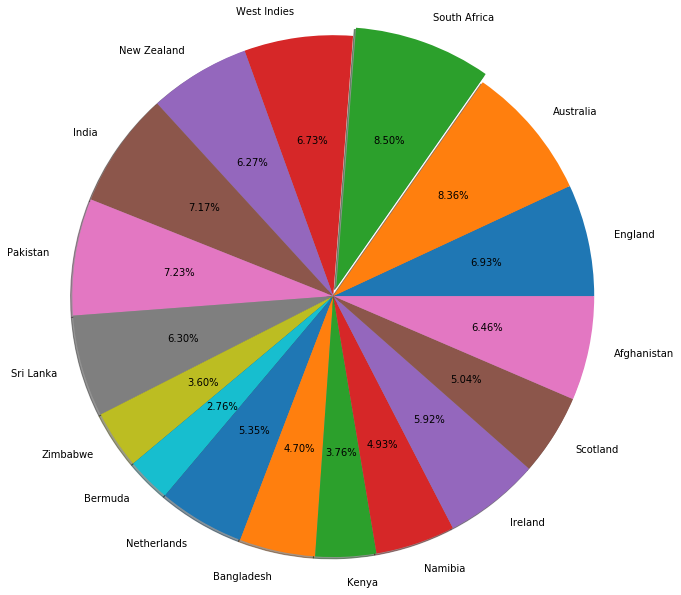

In [164]:
import matplotlib.pyplot as plt
subject =['England','Australia','South Africa','West Indies',
          'New Zealand','India','Pakistan','Sri Lanka','Zimbabwe','Bermuda','Netherlands','Bangladesh',
          'Kenya','Namibia','Ireland','Scotland','Afghanistan']
perc = [(375/746)*100,(575/949)*100,(385/625)*100,(401/822)*100,(351/772)*100,(513/987)*100,(486/927)*100,
        (389/852)*100,(138/529)*100,(7/35)*100,(31/80)*100,(128/376)*100,(42/154)*100,(5/14)*100,
        (67/156)*100,(42/115)*100,(59/126)*100]
explode = (0,0,0.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0)
plt.pie(perc,explode=explode,labels=subject,autopct='%1.2f%%',shadow=True,rotatelabels=False,radius=3)
plt.show()